# Samples Tests for any Faults

In [ ]:
# Test for faulty .npy files
import os
import numpy as np

root_dir = r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Lastt\numpy_samples_all_data"

# List all .npy files in the specified directory
file_list = [file for file in os.listdir(root_dir) if file.endswith('.npy')]

# Check for null values in each file
for file_name in file_list:
    file_path = os.path.join(root_dir, file_name)
    
    # Load the .npy file using NumPy
    data = np.load(file_path)
    
    # Check for null values (NaN or infinite values)
    if np.isnan(data).any() or np.isinf(data).any():
        print(f"File '{file_name}' contains null values.")

In [ ]:
import os
import numpy as np

# Define the expected shape
expected_shape = (1001, 6)

# Define the data path for the numpy files
data_path =  r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Lastt\numpy_samples_all_data"

# Initialize a list to store filenames with unexpected shapes
files_with_unexpected_shape = []

# Iterate over files in the directory
for filename in os.listdir(data_path):
    if filename.endswith(".npy"):  # Check if the file is a numpy file
        file_path = os.path.join(data_path, filename)
        data = np.load(file_path)
        if data.shape != expected_shape:
            files_with_unexpected_shape.append(filename)

# Print filenames with unexpected shapes
if files_with_unexpected_shape:
    print("Files with unexpected shapes:")
    for filename in files_with_unexpected_shape:
        print(filename)
else:
    print("All files have the expected shape (1001, 6)")


# One Hot Encoding 

In [ ]:

import os
import pandas as pd

data_paths = [
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\ADC",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\ADO",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\BD",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\BH",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\Engine_Start",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\Engine_Stop",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\FIC",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\FIO",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\Music",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\NC",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\NM",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\NO",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\PD",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\S",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\WLB",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\WLD",
    r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Combined_For_Test\Numpy_Samples_all_data_in_folders\WLU",
]

# Initialize lists to store file names and their corresponding labels
file_names = []
labels = []

# Loop through each data path and assign label encoding for file names
for index, path in enumerate(data_paths):
    label = os.path.basename(path)
    npy_files = [file for file in os.listdir(path) if file.endswith('.npy')]
    
    if npy_files:
        for file_name in npy_files:
            file_names.append(file_name)
            labels.append(index)  # Assign the index as the label (0, 1, 2, ...)

# Create a pandas DataFrame with file names and their corresponding labels
df = pd.DataFrame({'File_Name': file_names, 'Label': labels})

# Save the DataFrame to a CSV file
df.to_csv('class_labels_all.csv', index=False)


# Import Statements

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision.models as models
import os
import pandas as pd
from tqdm import tqdm
from pytorch_lightning import Trainer
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Gives easier dataset managment and creates mini batches
from torch.utils.tensorboard import SummaryWriter

import torch
import torch.optim as optim
import time 

# Data Loading

In [118]:
class MotionSensorDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
            file_name = self.annotations.iloc[index, 0]
            file_path = os.path.join(self.root_dir, file_name)

            data = np.load(file_path)
            y_label = int(self.annotations.iloc[index, 1])

            # Convert to PyTorch tensor if needed
            data_tensor = torch.from_numpy(data).float()  # Assuming 'data' is a NumPy array
            data_tensor = torch.unsqueeze(torch.tensor(data_tensor, dtype=torch.float32),0)


            return (data_tensor, torch.tensor(y_label))



In [119]:
dataset = MotionSensorDataset(
    csv_file ="class_labels_all.csv",
    root_dir= r"C:\Users\uig38452\Master Thesis\Data Recording\Data_recording_Lastt\numpy_samples_all_data_test", 
)

In [120]:
train_length = int(0.7 * len(dataset))
test_length = len(dataset) - train_length
train_set, test_set = torch.utils.data.random_split(dataset, [train_length, test_length])

train_loader = DataLoader(dataset=train_set, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=8, shuffle=False)

In [52]:
for i in train_loader:
    print(i)

C:\Users\uig38452\AppData\Local\Temp\ipykernel_25464\1029774408.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.unsqueeze(torch.tensor(data_tensor, dtype=torch.float32),0)


[tensor([[[[ 1.7767e+01, -1.0229e+03, -3.8822e+00, -2.7327e+00,  4.9862e+00,
           -7.7612e-01],
          [ 1.6810e+01, -1.0224e+03, -3.8045e+00, -2.9468e+00,  5.2602e+00,
           -6.2876e-01],
          [ 1.6194e+01, -1.0221e+03, -3.4252e+00, -3.1486e+00,  5.4755e+00,
           -4.4764e-01],
          ...,
          [ 1.8459e+01, -1.0232e+03, -1.2807e+00, -2.3437e+00,  4.1288e+00,
           -8.8444e-01],
          [ 1.9450e+01, -1.0233e+03, -1.6247e+00, -2.6593e+00,  4.2105e+00,
           -9.6156e-01],
          [ 1.9755e+01, -1.0234e+03, -1.9943e+00, -2.7992e+00,  4.4742e+00,
           -1.0372e+00]]],


        [[[ 3.2638e+01, -1.0270e+03,  3.0759e+00, -2.8551e+00, -6.3821e+01,
            7.6957e-01],
          [ 3.2095e+01, -1.0281e+03,  6.0616e+00, -2.8671e+00, -6.3715e+01,
            5.6784e-01],
          [ 3.1742e+01, -1.0268e+03,  9.1584e+00, -2.9019e+00, -6.3746e+01,
            2.8481e-01],
          ...,
          [ 2.9595e+01, -1.0256e+03,  1.1405e+01, -2.301

[tensor([[[[ 2.7542e+01, -1.0251e+03,  1.3342e+01, -3.6953e+00,  5.4535e+00,
           -2.5117e-01],
          [ 2.7671e+01, -1.0259e+03,  1.3176e+01, -3.4414e+00,  5.4750e+00,
           -2.9893e-01],
          [ 2.7990e+01, -1.0259e+03,  1.2726e+01, -3.1467e+00,  5.4624e+00,
           -2.8360e-01],
          ...,
          [ 2.6023e+01, -1.0278e+03,  2.1562e+01, -5.6982e+00, -2.8626e+00,
           -8.9330e-01],
          [ 2.6532e+01, -1.0284e+03,  2.2815e+01, -5.5352e+00, -2.9399e+00,
           -9.1441e-01],
          [ 2.6762e+01, -1.0284e+03,  2.4522e+01, -5.2273e+00, -2.9121e+00,
           -8.4457e-01]]],


        [[[ 1.5801e+01, -1.0246e+03, -1.8146e+00, -2.3223e+00,  3.7078e+00,
           -3.6903e-01],
          [ 1.5757e+01, -1.0237e+03, -1.7212e+00, -2.5259e+00,  3.8711e+00,
           -2.6899e-01],
          [ 1.6923e+01, -1.0233e+03, -1.5831e+00, -2.6281e+00,  4.1136e+00,
           -2.6552e-01],
          ...,
          [ 1.4944e+01, -1.0256e+03, -3.0741e+00, -2.136

[tensor([[[[ 2.6493e+01, -1.0254e+03,  8.0762e+00, -3.6269e-01, -3.5149e-01,
           -8.3892e-01],
          [ 2.7498e+01, -1.0257e+03,  7.4537e+00, -6.6531e-01, -3.3511e-01,
           -6.9962e-01],
          [ 2.7496e+01, -1.0252e+03,  7.4448e+00, -1.0036e+00, -4.4656e-01,
           -5.3280e-01],
          ...,
          [ 1.7837e+01, -1.0320e+03, -1.4624e+02,  1.5130e+01, -2.5659e+02,
           -6.2305e-01],
          [ 2.1496e+01, -1.0351e+03, -1.3578e+02,  1.2061e+01, -2.5548e+02,
           -7.0103e-01],
          [ 2.4682e+01, -1.0383e+03, -1.2371e+02,  9.0257e+00, -2.5432e+02,
           -6.5366e-01]]],


        [[[ 2.7421e+01, -1.0255e+03, -4.8639e+00, -1.4115e+00, -1.3354e+00,
           -1.4844e+00],
          [ 2.6851e+01, -1.0258e+03, -5.6694e+00, -1.2425e+00, -1.1508e+00,
           -1.3971e+00],
          [ 2.5637e+01, -1.0259e+03, -7.1964e+00, -1.1118e+00, -8.8930e-01,
           -1.2618e+00],
          ...,
          [ 2.8936e+01, -1.0025e+03,  5.6931e+00, -2.536

[tensor([[[[-5.8354e+01, -1.0298e+03,  3.8715e+00,  4.7495e+00, -4.4014e+02,
           -3.8065e+00],
          [-6.5379e+01, -1.0315e+03, -7.7272e+00,  5.9135e+00, -4.4092e+02,
           -3.7410e+00],
          [-6.6345e+01, -1.0312e+03, -1.4534e+01,  6.8876e+00, -4.4112e+02,
           -3.7717e+00],
          ...,
          [ 1.6731e+01, -1.0214e+03,  1.8466e+00, -1.6548e+00,  6.0197e+00,
           -8.8086e-01],
          [ 1.6666e+01, -1.0209e+03,  5.7917e-01, -1.4192e+00,  5.9086e+00,
           -1.1961e+00],
          [ 1.6831e+01, -1.0205e+03, -1.1595e+00, -1.1334e+00,  5.8193e+00,
           -1.4701e+00]]],


        [[[ 2.5626e+01, -1.0245e+03,  1.9956e+01, -4.2336e+00,  7.5415e+00,
           -8.5732e-01],
          [ 2.5745e+01, -1.0238e+03,  2.0662e+01, -4.1105e+00,  7.5683e+00,
           -7.1490e-01],
          [ 2.6241e+01, -1.0233e+03,  2.1484e+01, -4.0981e+00,  7.5188e+00,
           -5.4117e-01],
          ...,
          [ 3.1690e+01, -1.0220e+03,  2.2584e+01, -4.340

[tensor([[[[ 2.2531e+01, -1.0231e+03,  6.9699e+00, -1.8917e+00,  5.7181e+00,
           -8.3150e-01],
          [ 2.1949e+01, -1.0238e+03,  5.6044e+00, -2.1141e+00,  6.0118e+00,
           -8.9600e-01],
          [ 2.0794e+01, -1.0238e+03,  4.7968e+00, -2.1551e+00,  6.3088e+00,
           -1.1381e+00],
          ...,
          [ 1.6567e+01, -1.0316e+03,  3.5343e+01, -3.8541e+00,  5.1212e+00,
           -1.2188e+00],
          [ 1.6425e+01, -1.0333e+03,  1.3958e+01, -3.7688e-01,  4.3484e+00,
           -1.1646e+00],
          [ 1.7577e+01, -1.0356e+03, -8.8821e+00,  2.8369e+00,  3.3911e+00,
           -1.0084e+00]]],


        [[[ 1.6337e+01, -1.0227e+03, -8.0787e-01, -1.9111e+00,  6.8770e+00,
           -1.0789e+00],
          [ 1.6445e+01, -1.0222e+03, -6.3752e-01, -1.7389e+00,  6.7152e+00,
           -8.0226e-01],
          [ 1.6123e+01, -1.0217e+03, -1.0707e+00, -1.5655e+00,  6.4736e+00,
           -6.1612e-01],
          ...,
          [ 1.5309e+01, -1.0309e+03,  9.7812e+00, -1.456

[tensor([[[[ 1.9288e+01, -1.0226e+03, -1.9063e+00, -4.1479e+00,  4.8928e+00,
           -3.9887e-01],
          [ 1.9384e+01, -1.0230e+03, -1.4779e+00, -4.2509e+00,  5.1609e+00,
           -2.5583e-01],
          [ 1.9568e+01, -1.0231e+03, -1.1098e+00, -4.2958e+00,  5.5656e+00,
           -1.1889e-03],
          ...,
          [ 2.0933e+01, -1.0217e+03, -4.2817e+00, -4.5559e+00,  6.0230e+00,
           -2.0205e-01],
          [ 2.0925e+01, -1.0211e+03, -4.3652e+00, -4.4263e+00,  6.0679e+00,
           -1.0050e-01],
          [ 2.1074e+01, -1.0218e+03, -3.3603e+00, -4.2754e+00,  5.9661e+00,
           -1.0009e-02]]],


        [[[-2.0231e+00, -1.0198e+03, -1.5989e+01, -5.3136e+00,  2.3533e+02,
            2.2754e-01],
          [ 3.5021e+00, -1.0216e+03, -1.5671e+01, -5.4423e+00,  2.3552e+02,
            2.7249e-01],
          [ 7.0716e+00, -1.0241e+03, -1.5426e+01, -5.5959e+00,  2.3550e+02,
            4.5160e-01],
          ...,
          [ 4.7288e+01, -1.0077e+03, -7.9630e+01, -2.058

In [53]:
i[0].shape

torch.Size([2, 1, 1001, 6])

# Dataset Division

In [54]:
total_length = len(dataset)  # Get the total length of your dataset
print("Total Length of Dataset:", total_length)
print("Train length of Dataset:", train_length)
print("Test length of Dataset:", test_length)

Total Length of Dataset: 1352
Train length of Dataset: 946
Test length of Dataset: 406


In [55]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters

In [121]:
# Hyperparameters
in_channel = 6
num_classes = 17
learning_rate = 1e-1        #3e-4
num_epochs = 50

# Model Building

In [123]:
import torch.nn.functional as F

class CNNRNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNRNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 16, 3, 1, 1)
        self.conv3 = nn.Conv2d(16, 64, 3, 1, 1)
        self.rnn = nn.LSTM(input_size=64 * 1001, hidden_size=64, num_layers=4, dropout=0, bidirectional=True)
        self.fc1 = nn.Linear(128, 128)  # Adjust input size for FC layer based on hidden_size and sequence length
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.conv1(x)
       # print('x1', x.shape)
        x = F.relu(x)  # Apply ReLU activation after conv1
        x = self.conv2(x)
       # print('x2',x.shape)
        x = F.relu(x)  # Apply ReLU activation after conv2
        x = self.conv3(x)
        #print('x3',x.shape)
        x = F.relu(x)  # Apply ReLU activation after conv3
        x = x.permute(0, 3, 1, 2)  # Permute dimensions for LSTM input
        #print('xp',x.shape)
        x = x.view(x.size(0), x.size(1), -1)  # Flatten the spatial dimensions
        x, _ = self.rnn(x)
        x = x[:, -1, :]  # Consider the output of the last time step
       # print('xlstm',x.shape)
        x = self.fc1(x)
        #print('fc11',x.shape)
        x = F.relu(x)  # Apply ReLU activation after fc1
        x = self.fc2(x)
        #print('fc2',x.shape)
        return x


In [127]:
# Function to calculate accuracy
def calculate_accuracy(model, data_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in data_loader:
            data = data.to(device=device)
            targets = targets.to(device=device)
            
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    return 100 * correct / total


# Model Training

In [ ]:
model = CNNRNNClassifier(num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
#optimizer = optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=1e-5)
#optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-5, momentum=0.9)
#optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=1e-5, alpha=0.99, eps=1e-08)
#optimizer = optim.Adadelta(model.parameters(), rho=0.9, eps=1e-06, weight_decay=1e-5)


# Initialize lists to store losses per epoch
train_losses_per_epoch = []
test_losses_per_epoch = []
train_accuracies = []
test_accuracies = []

computation_speeds_ms_per_epoch = []

# Train Network
for epoch in tqdm(range(num_epochs)):
    start_time = time.time()
    
    losses = []
    

    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        losses.append(loss.item())

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate and store average training loss for this epoch
    train_loss = sum(losses)/len(losses)
    train_losses_per_epoch.append(train_loss)
    train_accuracy = calculate_accuracy(model, train_loader, device)
    train_accuracies.append(train_accuracy)
    print(f"Cost at epoch for Train Set {epoch} is {train_loss}")
    print(f"Epoch {epoch}: Train Loss = {train_loss}, Train Accuracy = {train_accuracy}")
    
    # No gradient calculation for testing
    with torch.no_grad():    
        test_losses = []
        for batch_idx, (data, targets) in enumerate(test_loader):
            data = data.to(device=device)
            targets = targets.to(device=device)

            # Forward pass
            scores = model(data)
            loss_test = criterion(scores, targets)
            test_losses.append(loss_test.item())

        # Calculate and store average test loss for this epoch
        test_loss = sum(test_losses)/len(test_losses)
        test_losses_per_epoch.append(test_loss)
        test_accuracy = calculate_accuracy(model, test_loader, device)
        test_accuracies.append(test_accuracy)
        #print(f"Cost at epoch for test Set {epoch} is {test_loss}")
        print(f"Epoch {epoch}: Test Loss = {test_loss}, Test Accuracy = {test_accuracy}")
        
    end_time = time.time()  # End timing the epoch
    epoch_duration = (end_time - start_time) * 1000  # Convert epoch duration to milliseconds
    
    computation_speeds_ms_per_epoch.append(epoch_duration)  # Store the computation speed for this epoch
    
    print(f"Epoch {epoch}: Computation Speed = {epoch_duration:.2f} ms")



  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\uig38452\AppData\Local\Temp\ipykernel_25464\1029774408.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.unsqueeze(torch.tensor(data_tensor, dtype=torch.float32),0)


Cost at epoch for Train Set 0 is 4.48992688258489
Epoch 0: Train Loss = 4.48992688258489, Train Accuracy = 7.293868921775899


  2%|▏         | 1/50 [00:54<44:36, 54.61s/it]

Epoch 0: Test Loss = 2.8007209534738577, Test Accuracy = 6.896551724137931
Epoch 0: Computation Speed = 54612.96 ms
Cost at epoch for Train Set 1 is 2.801447904109955
Epoch 1: Train Loss = 2.801447904109955, Train Accuracy = 7.822410147991543


  4%|▍         | 2/50 [01:47<42:50, 53.55s/it]

Epoch 1: Test Loss = 2.8016586677700865, Test Accuracy = 7.635467980295567
Epoch 1: Computation Speed = 52804.31 ms
Cost at epoch for Train Set 2 is 2.803605039914449
Epoch 2: Train Loss = 2.803605039914449, Train Accuracy = 7.6109936575052854


  6%|▌         | 3/50 [02:42<42:19, 54.03s/it]

Epoch 2: Test Loss = 2.801306214987063, Test Accuracy = 4.926108374384237
Epoch 2: Computation Speed = 54608.13 ms
Cost at epoch for Train Set 3 is 2.8063158949216205
Epoch 3: Train Loss = 2.8063158949216205, Train Accuracy = 7.293868921775899


  8%|▊         | 4/50 [03:36<41:39, 54.33s/it]

Epoch 3: Test Loss = 2.802136692346311, Test Accuracy = 6.896551724137931
Epoch 3: Computation Speed = 54785.65 ms
Cost at epoch for Train Set 4 is 2.80309579372406
Epoch 4: Train Loss = 2.80309579372406, Train Accuracy = 6.765327695560254


 10%|█         | 5/50 [04:30<40:32, 54.06s/it]

Epoch 4: Test Loss = 2.806483974643782, Test Accuracy = 6.650246305418719
Epoch 4: Computation Speed = 53581.37 ms
Cost at epoch for Train Set 5 is 2.8120279192924498
Epoch 5: Train Loss = 2.8120279192924498, Train Accuracy = 6.659619450317125


 12%|█▏        | 6/50 [05:25<39:48, 54.29s/it]

Epoch 5: Test Loss = 2.8032545949898515, Test Accuracy = 7.635467980295567
Epoch 5: Computation Speed = 54749.99 ms
Cost at epoch for Train Set 6 is 2.8129057049751283
Epoch 6: Train Loss = 2.8129057049751283, Train Accuracy = 7.08245243128964


 14%|█▍        | 7/50 [06:19<39:00, 54.43s/it]

Epoch 6: Test Loss = 2.800243008370493, Test Accuracy = 7.142857142857143
Epoch 6: Computation Speed = 54691.40 ms
Cost at epoch for Train Set 7 is 2.80552917321523
Epoch 7: Train Loss = 2.80552917321523, Train Accuracy = 7.08245243128964


 16%|█▌        | 8/50 [07:14<38:12, 54.57s/it]

Epoch 7: Test Loss = 2.8150205378438913, Test Accuracy = 7.142857142857143
Epoch 7: Computation Speed = 54891.56 ms
Cost at epoch for Train Set 8 is 2.8088835080464682
Epoch 8: Train Loss = 2.8088835080464682, Train Accuracy = 7.6109936575052854


 18%|█▊        | 9/50 [08:07<36:55, 54.04s/it]

Epoch 8: Test Loss = 2.812385418835808, Test Accuracy = 4.926108374384237
Epoch 8: Computation Speed = 52852.75 ms
Cost at epoch for Train Set 9 is 7.874517997105916
Epoch 9: Train Loss = 7.874517997105916, Train Accuracy = 7.293868921775899


 20%|██        | 10/50 [09:00<35:43, 53.58s/it]

Epoch 9: Test Loss = 2.802552863663318, Test Accuracy = 7.142857142857143
Epoch 9: Computation Speed = 52539.54 ms
Cost at epoch for Train Set 10 is 2.803706892331441
Epoch 10: Train Loss = 2.803706892331441, Train Accuracy = 7.293868921775899


 22%|██▏       | 11/50 [09:52<34:37, 53.28s/it]

Epoch 10: Test Loss = 2.8187700065911985, Test Accuracy = 6.896551724137931
Epoch 10: Computation Speed = 52603.21 ms
Cost at epoch for Train Set 11 is 2.8198368231455486
Epoch 11: Train Loss = 2.8198368231455486, Train Accuracy = 7.08245243128964


 24%|██▍       | 12/50 [10:45<33:40, 53.17s/it]

Epoch 11: Test Loss = 2.7994590179592955, Test Accuracy = 7.142857142857143
Epoch 11: Computation Speed = 52916.51 ms
Cost at epoch for Train Set 12 is 2.817108631134033
Epoch 12: Train Loss = 2.817108631134033, Train Accuracy = 7.293868921775899


 26%|██▌       | 13/50 [11:38<32:43, 53.07s/it]

Epoch 12: Test Loss = 2.817284808439367, Test Accuracy = 8.866995073891626
Epoch 12: Computation Speed = 52840.18 ms
Cost at epoch for Train Set 13 is 2.8163810054461162
Epoch 13: Train Loss = 2.8163810054461162, Train Accuracy = 7.293868921775899


 28%|██▊       | 14/50 [12:29<31:31, 52.54s/it]

Epoch 13: Test Loss = 2.8078281365188897, Test Accuracy = 7.142857142857143
Epoch 13: Computation Speed = 51323.08 ms
Cost at epoch for Train Set 14 is 2.813041690985362
Epoch 14: Train Loss = 2.813041690985362, Train Accuracy = 6.765327695560254


 30%|███       | 15/50 [13:20<30:20, 52.02s/it]

Epoch 14: Test Loss = 2.8054761746350456, Test Accuracy = 6.650246305418719
Epoch 14: Computation Speed = 50819.68 ms
Cost at epoch for Train Set 15 is 2.8015928069750466
Epoch 15: Train Loss = 2.8015928069750466, Train Accuracy = 7.6109936575052854


 32%|███▏      | 16/50 [14:11<29:16, 51.67s/it]

Epoch 15: Test Loss = 2.7968508215511547, Test Accuracy = 4.926108374384237
Epoch 15: Computation Speed = 50865.00 ms
Cost at epoch for Train Set 16 is 2.825753064950307
Epoch 16: Train Loss = 2.825753064950307, Train Accuracy = 7.293868921775899


 34%|███▍      | 17/50 [15:02<28:17, 51.43s/it]

Epoch 16: Test Loss = 2.8135271446377623, Test Accuracy = 7.142857142857143
Epoch 16: Computation Speed = 50866.43 ms
Cost at epoch for Train Set 17 is 2.8087830901145936
Epoch 17: Train Loss = 2.8087830901145936, Train Accuracy = 7.6109936575052854


 36%|███▌      | 18/50 [15:53<27:20, 51.26s/it]

Epoch 17: Test Loss = 2.823040868721756, Test Accuracy = 4.926108374384237
Epoch 17: Computation Speed = 50847.88 ms
Cost at epoch for Train Set 18 is 2.8043715198834738
Epoch 18: Train Loss = 2.8043715198834738, Train Accuracy = 7.293868921775899


 38%|███▊      | 19/50 [16:44<26:26, 51.18s/it]

Epoch 18: Test Loss = 2.8097408285327985, Test Accuracy = 8.866995073891626
Epoch 18: Computation Speed = 50962.68 ms
Cost at epoch for Train Set 19 is 2.811203118165334
Epoch 19: Train Loss = 2.811203118165334, Train Accuracy = 7.293868921775899


 40%|████      | 20/50 [17:35<25:34, 51.14s/it]

Epoch 19: Test Loss = 2.796909402398502, Test Accuracy = 8.866995073891626
Epoch 19: Computation Speed = 51041.15 ms
Cost at epoch for Train Set 20 is 2.809667146205902
Epoch 20: Train Loss = 2.809667146205902, Train Accuracy = 7.293868921775899


 42%|████▏     | 21/50 [18:26<24:41, 51.08s/it]

Epoch 20: Test Loss = 2.811912597394457, Test Accuracy = 8.866995073891626
Epoch 20: Computation Speed = 50962.97 ms
Cost at epoch for Train Set 21 is 2.8226752281188965
Epoch 21: Train Loss = 2.8226752281188965, Train Accuracy = 7.6109936575052854


 44%|████▍     | 22/50 [19:16<23:47, 50.99s/it]

Epoch 21: Test Loss = 2.8013864451763677, Test Accuracy = 4.926108374384237
Epoch 21: Computation Speed = 50762.16 ms
Cost at epoch for Train Set 22 is 2.8133928497632343
Epoch 22: Train Loss = 2.8133928497632343, Train Accuracy = 7.293868921775899


 46%|████▌     | 23/50 [20:07<22:55, 50.95s/it]

Epoch 22: Test Loss = 2.8076014051250384, Test Accuracy = 6.896551724137931
Epoch 22: Computation Speed = 50849.02 ms
Cost at epoch for Train Set 23 is 2.811284295717875
Epoch 23: Train Loss = 2.811284295717875, Train Accuracy = 7.293868921775899


 48%|████▊     | 24/50 [20:58<22:02, 50.86s/it]

Epoch 23: Test Loss = 2.7970020490534164, Test Accuracy = 8.866995073891626
Epoch 23: Computation Speed = 50672.26 ms
Cost at epoch for Train Set 24 is 2.804999907811483
Epoch 24: Train Loss = 2.804999907811483, Train Accuracy = 7.293868921775899


 50%|█████     | 25/50 [21:49<21:09, 50.79s/it]

Epoch 24: Test Loss = 2.7985567532333673, Test Accuracy = 7.142857142857143
Epoch 24: Computation Speed = 50606.67 ms
Cost at epoch for Train Set 25 is 2.8010737458864847
Epoch 25: Train Loss = 2.8010737458864847, Train Accuracy = 7.822410147991543


 52%|█████▏    | 26/50 [22:39<20:16, 50.71s/it]

Epoch 25: Test Loss = 2.7970455487569175, Test Accuracy = 7.635467980295567
Epoch 25: Computation Speed = 50516.93 ms
Cost at epoch for Train Set 26 is 2.813244378566742
Epoch 26: Train Loss = 2.813244378566742, Train Accuracy = 7.6109936575052854


 54%|█████▍    | 27/50 [23:30<19:26, 50.71s/it]

Epoch 26: Test Loss = 2.81651177593306, Test Accuracy = 4.926108374384237
Epoch 26: Computation Speed = 50716.25 ms
Cost at epoch for Train Set 27 is 2.8216127038002012
Epoch 27: Train Loss = 2.8216127038002012, Train Accuracy = 7.6109936575052854


 56%|█████▌    | 28/50 [24:20<18:35, 50.68s/it]

Epoch 27: Test Loss = 2.8187595021490957, Test Accuracy = 4.926108374384237
Epoch 27: Computation Speed = 50623.32 ms
Cost at epoch for Train Set 28 is 2.8198167363802593
Epoch 28: Train Loss = 2.8198167363802593, Train Accuracy = 7.822410147991543


 58%|█████▊    | 29/50 [25:11<17:43, 50.67s/it]

Epoch 28: Test Loss = 2.8092884736902572, Test Accuracy = 7.635467980295567
Epoch 28: Computation Speed = 50627.80 ms
Cost at epoch for Train Set 29 is 2.8178523063659666
Epoch 29: Train Loss = 2.8178523063659666, Train Accuracy = 7.293868921775899


 60%|██████    | 30/50 [26:02<16:53, 50.68s/it]

Epoch 29: Test Loss = 2.8001578882628797, Test Accuracy = 6.896551724137931
Epoch 29: Computation Speed = 50702.55 ms
Cost at epoch for Train Set 30 is 2.8074976722399394
Epoch 30: Train Loss = 2.8074976722399394, Train Accuracy = 5.708245243128964


 62%|██████▏   | 31/50 [26:52<16:02, 50.66s/it]

Epoch 30: Test Loss = 2.796910613190894, Test Accuracy = 6.896551724137931
Epoch 30: Computation Speed = 50605.29 ms
Cost at epoch for Train Set 31 is 2.812283988793691
Epoch 31: Train Loss = 2.812283988793691, Train Accuracy = 7.08245243128964


 64%|██████▍   | 32/50 [27:43<15:11, 50.64s/it]

Epoch 31: Test Loss = 2.802068537356807, Test Accuracy = 7.142857142857143
Epoch 31: Computation Speed = 50589.28 ms
Cost at epoch for Train Set 32 is 2.800191378593445
Epoch 32: Train Loss = 2.800191378593445, Train Accuracy = 7.08245243128964


 66%|██████▌   | 33/50 [28:34<14:20, 50.62s/it]

Epoch 32: Test Loss = 2.822143185372446, Test Accuracy = 7.142857142857143
Epoch 32: Computation Speed = 50568.20 ms
Cost at epoch for Train Set 33 is 2.819943392276764
Epoch 33: Train Loss = 2.819943392276764, Train Accuracy = 7.6109936575052854


 68%|██████▊   | 34/50 [29:24<13:30, 50.63s/it]

Epoch 33: Test Loss = 2.8099774379356233, Test Accuracy = 4.926108374384237
Epoch 33: Computation Speed = 50668.22 ms


In [ ]:
import matplotlib.pyplot as plt

# Assuming train_accuracies and test_accuracies are lists that contain the accuracy for each epoch
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))

# Plotting train and test accuracies
plt.plot(epochs, train_accuracies, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Train Accuracy')
plt.plot(epochs, test_accuracies, color='red', marker='s', linestyle='-', linewidth=2, markersize=5, label='Test Accuracy')

# Adding titles and labels
plt.title('Training and Test Accuracies Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Adding legend
plt.legend(loc='lower right', fontsize=12)

# Showing the plot
plt.show()


In [ ]:
# Check accuracy on training to see how good our model is
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(
            f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}"
        )

    model.train()


print("Checking accuracy on Training Set")
check_accuracy(train_loader, model)

print("Checking accuracy on Test Set")
check_accuracy(test_loader, model)

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

def get_all_preds_labels(model, loader, device):
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    return all_preds, all_labels


In [ ]:
def print_metrics(model, loader, device):
    all_preds, all_labels = get_all_preds_labels(model, loader, device)
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')
    
    # For MSE, ensure all_labels and all_preds are appropriate types
    all_labels_array = np.array(all_labels)
    all_preds_array = np.array(all_preds)
    mse = mean_squared_error(all_labels_array, all_preds_array)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MSE: {mse:.4f}")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Initialize empty lists to store true and predicted labels
true_labels_list = []
predicted_labels_list = []

with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward pass
        scores = model(data)
        _, predicted_labels = scores.max(1)  # Get the predicted labels
        
        # Append true and predicted labels to lists
        true_labels_list.extend(targets.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())
        
# Convert lists to NumPy arrays
true_labels = np.array(true_labels_list)
predicted_labels = np.array(predicted_labels_list)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# For MSE, ensure all_labels and all_preds are appropriate types
all_labels_array = np.array(true_labels)
all_preds_array = np.array(predicted_labels)
mse = mean_squared_error(all_labels_array, all_preds_array)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"MSE: {mse:.4f}")  # MSE is not typically expressed as a percentage


C:\Users\uig38452\AppData\Local\Temp\ipykernel_25464\1029774408.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.unsqueeze(torch.tensor(data_tensor, dtype=torch.float32),0)


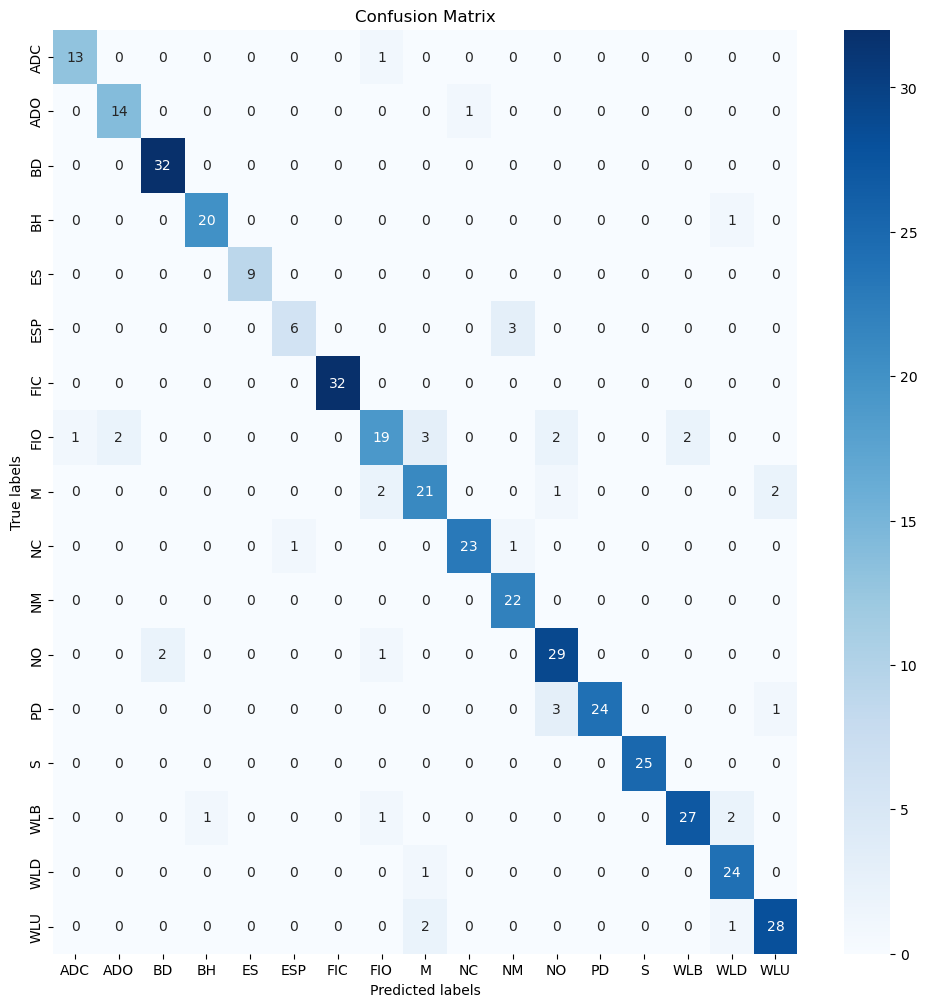

In [108]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


true_labels_list = []
predicted_labels_list = []

with torch.no_grad():
    for batch_idx, (data, targets) in enumerate(test_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)

        # Forward pass
        scores = model(data)
        _, predicted_labels = scores.max(1)  # Get the predicted labels
        
        # Append true and predicted labels to lists
        true_labels_list.extend(targets.cpu().numpy())
        predicted_labels_list.extend(predicted_labels.cpu().numpy())

# Convert lists to NumPy arrays
true_labels = np.array(true_labels_list)
predicted_labels = np.array(predicted_labels_list)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Custom class labels
classes= ['ADC',"ADO","BD", "BH","ES", "ESP", "FIC", "FIO","M","NC","NM","NO","PD","S","WLB","WLD","WLU"] 

# Plot confusion matrix using Seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xticks(np.arange(len(classes)) + 0.5, classes)
plt.yticks(np.arange(len(classes)) + 0.5, classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [109]:
from sklearn.metrics import classification_report

# Compute precision, recall, and F1 score for each class
report = classification_report(true_labels, predicted_labels, target_names=classes)
print(report)


              precision    recall  f1-score   support

         ADC       0.93      0.93      0.93        14
         ADO       0.88      0.93      0.90        15
          BD       0.94      1.00      0.97        32
          BH       0.95      0.95      0.95        21
          ES       1.00      1.00      1.00         9
         ESP       0.86      0.67      0.75         9
         FIC       1.00      1.00      1.00        32
         FIO       0.79      0.66      0.72        29
           M       0.78      0.81      0.79        26
          NC       0.96      0.92      0.94        25
          NM       0.85      1.00      0.92        22
          NO       0.83      0.91      0.87        32
          PD       1.00      0.86      0.92        28
           S       1.00      1.00      1.00        25
         WLB       0.93      0.87      0.90        31
         WLD       0.86      0.96      0.91        25
         WLU       0.90      0.90      0.90        31

    accuracy              

In [112]:
import json

# Load class names from JSON file
with open(r"U:\BODY_PROJECTS\DOOR_SYSTEMS\SysEng_DCM_Students\300_Studenten\Abdullah Asif\class_labels_onehot.json", 'r') as f:
    class_names = json.load(f)

# Invert the dictionary to get a mapping from indices to class names
index_to_classname = {value: key for key, value in class_names.items()}


In [113]:
import torch

def calculate_classwise_accuracy(model, data_loader, device, num_classes, index_to_classname):

    model.eval()
    correct_pred = {classname: 0 for classname in range(num_classes)}
    total_pred = {classname: 0 for classname in range(num_classes)}

    with torch.no_grad():
        for data, targets in data_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predictions = torch.max(outputs, 1)
            for label, prediction in zip(targets, predictions):
                if label == prediction:
                    correct_pred[label.item()] += 1
                total_pred[label.item()] += 1

    classwise_accuracy = {}
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname] if total_pred[classname] > 0 else 0
        readable_classname = index_to_classname.get(classname, f"Class {classname}")
        classwise_accuracy[readable_classname] = accuracy
        print(f"Accuracy for class {readable_classname} is: {accuracy:.2f} %")

    return classwise_accuracy


In [114]:
classwise_accuracy = calculate_classwise_accuracy(model, test_loader, device, len(index_to_classname), index_to_classname)


C:\Users\uig38452\AppData\Local\Temp\ipykernel_25464\1029774408.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_tensor = torch.unsqueeze(torch.tensor(data_tensor, dtype=torch.float32),0)


Accuracy for class ADC is: 92.86 %
Accuracy for class ADO is: 93.33 %
Accuracy for class BD is: 100.00 %
Accuracy for class BH is: 95.24 %
Accuracy for class EST is: 100.00 %
Accuracy for class ESP is: 66.67 %
Accuracy for class FIC is: 100.00 %
Accuracy for class FIO is: 65.52 %
Accuracy for class M is: 80.77 %
Accuracy for class NC is: 92.00 %
Accuracy for class NM is: 100.00 %
Accuracy for class NO is: 90.62 %
Accuracy for class PD is: 85.71 %
Accuracy for class S is: 100.00 %
Accuracy for class WLB is: 87.10 %
Accuracy for class WLD is: 96.00 %
Accuracy for class WLU is: 90.32 %


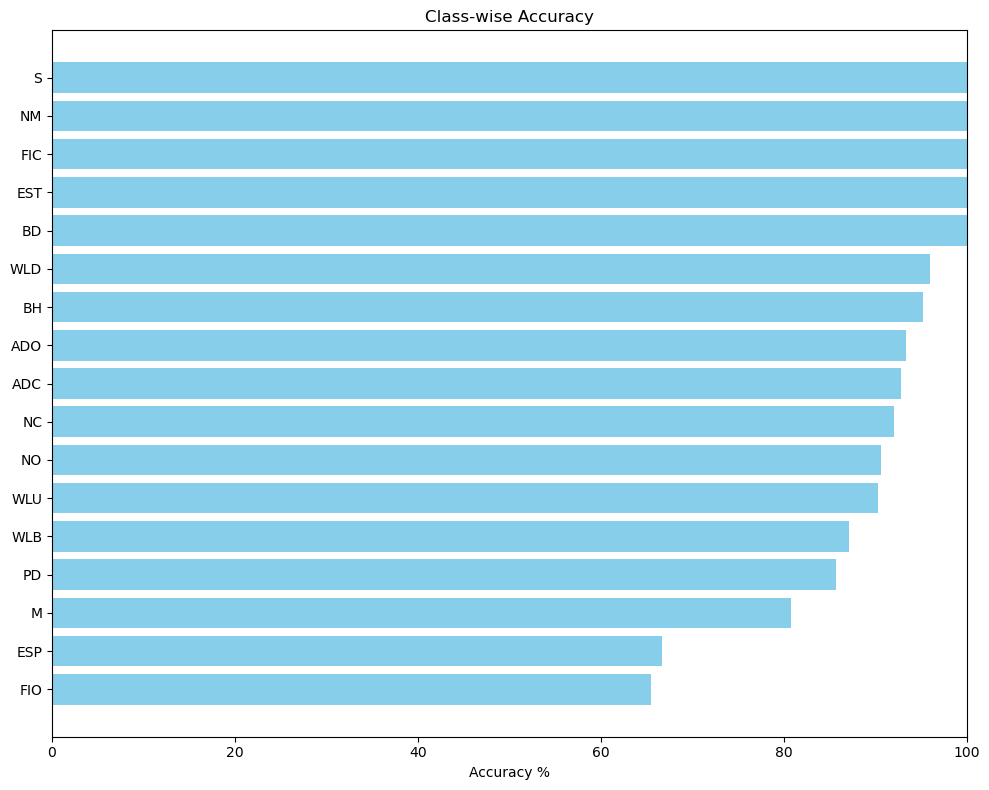

In [116]:
import matplotlib.pyplot as plt

# Extract class names and their corresponding accuracies
class_names = list(classwise_accuracy.keys())
accuracies = list(classwise_accuracy.values())

# Sort the classes by accuracy if desired
sorted_indices = [i[0] for i in sorted(enumerate(accuracies), key=lambda x: x[1])]
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Create a bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(sorted_class_names, sorted_accuracies, color='skyblue')
plt.xlabel('Accuracy %')
plt.title('Class-wise Accuracy')
plt.xlim(0, 100)  # Assuming accuracy values are percentages
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import os
import numpy as np

data_path = r"C:\Users\uig38452\Master Thesis\Data Recording\Test Data"

# Function to load numpy samples from a directory
def load_numpy_samples(data_path):
    samples = []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.npy'):  # Assuming numpy samples have .npy extension
            sample = np.load(os.path.join(data_path, file_name))
            samples.append(sample)
    return samples

# Load numpy samples from the specified directory
samples = load_numpy_samples(data_path)


In [ ]:
# Function to calculate the average of the third column of a numpy array
def calculate_average_of_third_column(array):
    return np.mean(array[:, 2])  # Assuming the third column index is 2

# Load numpy samples from the specified directory
samples = load_numpy_samples(data_path)

# Calculate and print the average of the third column for each array
for i, sample in enumerate(samples):
    avg_third_column = calculate_average_of_third_column(sample)
    #print(f"Average of the third column of sample {i+1}: {avg_third_column}")

In [ ]:
def calculate_average_force(array, mass, conversion_factor):
    acceleration = calculate_average_of_third_column(array) * conversion_factor
    force = mass * acceleration
    return force

door_mass = 20
conversion_factor = 0.0005987548828125

# Calculate and print the average force exerted by the door for each sample
for i, sample in enumerate(samples):
    avg_force = calculate_average_force(sample, door_mass, conversion_factor)
   # print(f"Average force exerted by the door in sample {i+1}: {avg_force} Newtons")

In [ ]:
import torch

def prepare_samples(samples):
    prepared_samples = []
    for sample in samples:
        # Convert the sample to a PyTorch tensor
        tensor_sample = torch.tensor(sample, dtype=torch.float32)
        # Add extra dimensions to match the expected input shape
        tensor_sample = tensor_sample.unsqueeze(0)  # Add batch dimension
        tensor_sample = tensor_sample.unsqueeze(0)  # Add channel dimension (assuming grayscale images)
        prepared_samples.append(tensor_sample)
    return prepared_samples

# Now, use the prepare_samples function to process all samples
prepared_samples = prepare_samples(samples)


In [ ]:
# Set model to evaluation mode
model.eval()

# Classify samples
predictions = []
with torch.no_grad():
    for sample in prepared_samples:
        # Move sample to device if using GPU
        sample = sample.to(device)
        # Forward pass
        output = model(sample)
        # Get predicted class index
        _, predicted_class_index = torch.max(output, 1)
        predictions.append(predicted_class_index.item())



In [ ]:
import os

# Function to load file names from a directory
def load_file_names(data_path):
    file_names = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            file_names.append(file)
    return file_names

# Load file names
file_names = load_file_names(data_path)

# Convert the list of file names into a pandas DataFrame
df1 = pd.DataFrame(file_names, columns=['File Name'])

In [ ]:
import pandas as pd

# Assuming you have df1 and df2 already defined
# Create a DataFrame with file names and predicted class names
data = {'File Name': file_names, 'Predicted Class': [index_to_classname.get(prediction, "Unknown") for prediction in predictions]}
df2 = pd.DataFrame(data)

# Assuming df1 and df2 have been reset their indexes
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# Concatenate df1 and df2 along columns
result_df = pd.concat([df1, df2], axis=1)

# Display the resulting DataFrame as a table
print(result_df.to_string(index=False))


In [ ]:
import os
import numpy as np

def load_numpy_samples_with_names(data_path):
    samples = []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.npy'):
            # Load the sample
            sample = np.load(os.path.join(data_path, file_name))
            # Append the sample and its name (without extension)
            sample_name = os.path.splitext(file_name)[0]
            samples.append((sample_name, sample))
    return samples


In [ ]:
def calculate_force_from_third_column(array, mass, conversion_factor, reading_index=0):
    # Extract the specific reading from the third column
    acceleration = array[reading_index, 2] * conversion_factor
    force = mass * acceleration
    return force

# Assuming `samples_with_names` is a list of tuples containing sample names and their data
door_mass = 20  # Door mass in kg
conversion_factor = 0.0005987548828125  # Conversion factor from LSB to m/s^2

# Example usage of the modified function
for sample_name, sample in samples_with_names:
    # Calculate force using a specific reading from the third column
    # You can adjust the `reading_index` if you want to use a different reading
    force = calculate_force_from_third_column(sample, door_mass, conversion_factor, reading_index=0)
    print(f"Force exerted by the door in sample '{sample_name}': {force} Newtons")


In [ ]:
import os
import numpy as np

data_path = r"C:\Users\uig38452\Master Thesis\Data Recording\Test Data"

# Function to load numpy samples from a directory
def load_numpy_samples(data_path):
    samples = []
    for file_name in os.listdir(data_path):
        if file_name.endswith('.npy'):  # Assuming numpy samples have .npy extension
            sample = np.load(os.path.join(data_path, file_name))
            samples.append(sample)
    return samples

# Load numpy samples from the specified directory
samples = load_numpy_samples(data_path)


In [ ]:
import torch

def prepare_samples(samples):
    prepared_samples = []
    for sample in samples:
        # Convert the sample to a PyTorch tensor
        tensor_sample = torch.tensor(sample, dtype=torch.float32)
        # Add extra dimensions to match the expected input shape
        tensor_sample = tensor_sample.unsqueeze(0)  # Add batch dimension
        tensor_sample = tensor_sample.unsqueeze(0)  # Add channel dimension (assuming grayscale images)
        prepared_samples.append(tensor_sample)
    return prepared_samples

# Now, use the prepare_samples function to process all samples
prepared_samples = prepare_samples(samples)


In [ ]:
# Set model to evaluation mode
model.eval()

# Classify samples
predictions = []
with torch.no_grad():
    for sample in prepared_samples:
        # Move sample to device if using GPU
        sample = sample.to(device)
        # Forward pass
        output = model(sample)
        # Get predicted class index
        _, predicted_class_index = torch.max(output, 1)
        predictions.append(predicted_class_index.item())



In [ ]:
import os

# Function to load file names from a directory
def load_file_names(data_path):
    file_names = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            file_names.append(file)
    return file_names

# Load file names
file_names = load_file_names(data_path)

In [ ]:
import pandas as pd

# Create a DataFrame with file names and predicted class names
data = {'File Name': file_names, 'Predicted Class': [index_to_classname.get(prediction, "Unknown") for prediction in predictions]}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
